In [32]:
# import pandas, numpy, and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a dataframe from a cvs file
df = pd.read_csv('AAPL.csv', parse_dates=True, index_col = 'Date' )
# checking the dimensionality of the dataframe
df.shape
# viewing the top reacords of the dataframe
df.head()
# checking for duplicate records and dropping them if any
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6193 entries, 1996-01-02 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6193 non-null   float64
 1   High       6193 non-null   float64
 2   Low        6193 non-null   float64
 3   Close      6193 non-null   float64
 4   Adj Close  6193 non-null   float64
 5   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 338.7 KB


In [10]:
# Basic descriptive statistics for each column 
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6193.000000,6193.000000,6193.000000,6193.000000,6193.000000,6.193000e+03
mean,56.237443,56.820016,55.671111,56.272008,52.994036,1.096375e+08
std,74.910837,75.740761,74.210479,75.039504,73.670390,9.725212e+07
min,0.459821,0.473214,0.455357,0.462054,0.399999,9.835000e+06
25%,1.633929,1.665179,1.600714,1.634286,1.414797,4.438730e+07
50%,18.492857,18.900000,18.090000,18.485714,16.003035,8.156190e+07
75%,94.040001,94.820000,93.040001,94.019997,84.512062,1.429260e+08
max,441.619995,457.649994,439.190002,455.609985,455.609985,1.855410e+09


In [11]:
df['Adj Close'].value_counts()

0.514008      13
0.525602      10
0.765215       8
0.664732       8
0.711109       8
              ..
11.145237      1
47.437740      1
23.492554      1
217.065186     1
66.986145      1
Name: Adj Close, Length: 5218, dtype: int64

In [12]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6188,2020-07-31,411.540009,425.660004,403.299988,425.040009,425.040009,93584200
6189,2020-08-03,432.799988,446.549988,431.570007,435.750000,435.750000,77037800
6190,2020-08-04,436.529999,443.160004,433.549988,438.660004,438.660004,43267900
6191,2020-08-05,437.510010,441.570007,435.589996,440.250000,440.250000,30498000
6192,2020-08-06,441.619995,457.649994,439.190002,455.609985,455.609985,50490000


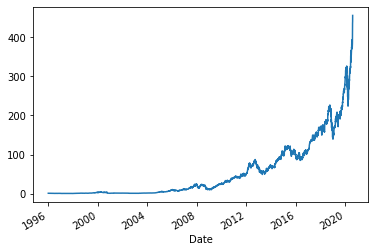

In [14]:
df['Adj Close'].plot()
plt.show()

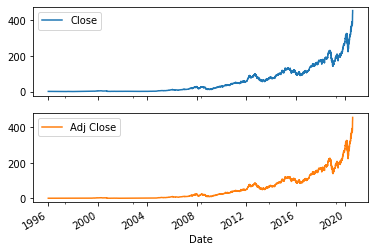

In [17]:
df.loc[ slice('1996','2020'), ['Close','Adj Close']].plot(subplots=True)
plt.show()

<AxesSubplot:>

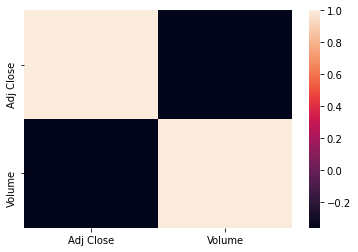

In [26]:
# try to find correlation between attributes
data = df[['Adj Close','Volume']]
correlation = data.corr(method='pearson')
sns.heatmap(correlation)

Text(0.5, 1.0, 'Correlation matrix')

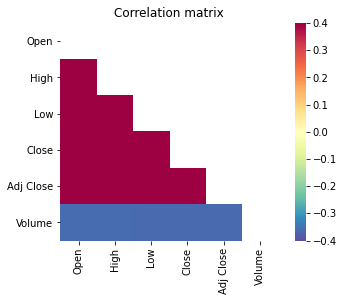

In [25]:
# referral https://raphaelvallat.com/correlation.html
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [59]:
# design a function to calculate the simple moving average
# SMA uses a sliding window to take the average over a set number of time periods 
# It is an equally weighted mean of the previous n data
# SMA = (Sum(price, n)) / n    
# Where: n = Time Period
def sma(x,n):
    return pd.DataFrame(x).rolling(window=n).mean()

# add a new column in df to store the SMA
df['SMA']= sma(df['Adj Close'],4) 
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA
Date,,,,,,,
1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600,NaN
1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400,NaN
1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600,NaN
1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000,1.005310
1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200,1.024634
